# Exercie 1: Échauffement avec le jeu de données Hearthstone

In [1]:
import pandas as pd  # charge le module pandas et le renomme pd
data = pd.read_csv("full_dataset.csv")

len(data)

data.columns[0]
data.columns[2]
data.columns[-1] 

data.shape

data.iloc[0]

data.iloc[0:5]
data.iloc[-5:-1]
data.iloc[0:10:3]

data["my_health"]

data[["my_health","my_hand"]].iloc[0:5]

data["my_health"] > 20
data["my_health"] > data["opponent_health"]

data["my_board_nb_creatures"].value_counts()

data.loc[(data["my_health"] > data["opponent_health"]) & (data["my_board_nb_creatures"] == 2)]

,game_id,me_playing,my_board_nb_creatures,my_board_total_attack,my_board_total_health,my_class,my_hand,my_health,opponent_board_nb_creatures,opponent_board_total_attack,opponent_board_total_health,opponent_class,opponent_hand,opponent_health,result,turn_id,turns_to_end
1,434,True,2,4.0,6.0,Mage,3,30,2,6.0,3.0,Warlock,3,27,0,2,9
33,481,True,2,3.0,5.0,Mage,3,30,0,0.0,0.0,Warrior,6,29,1,1,16
45,481,True,2,6.0,8.0,Mage,4,24,2,4.0,5.0,Warrior,5,9,1,13,4
47,481,True,2,9.0,7.0,Mage,3,21,2,5.0,4.0,Warrior,7,9,1,15,2
60,1356,True,2,6.0,5.0,Mage,2,28,1,1.0,1.0,Paladin,5,20,0,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36103,1786,True,2,6.0,3.0,Paladin,2,28,0,0.0,0.0,Hunter,4,26,1,3,9
36105,1786,True,2,6.0,3.0,Paladin,4,28,0,0.0,0.0,Hunter,4,22,1,5,7
36106,1786,False,2,4.0,3.0,Paladin,4,26,1,3.0,1.0,Hunter,4,22,1,6,6
36109,1786,True,2,8.0,8.0,Paladin,3,23,1,3.0,5.0,Hunter,4,15,1,9,3


# Analyse exploratoire des données

## Description des opérations effectuées

1. **Taille du dataset**
   - `len(data)` : Affiche le nombre total de lignes dans le dataset

2. **Accès aux colonnes**
   - `data.columns[0]` : Affiche le nom de la première colonne
   - `data.columns[2]` : Affiche le nom de la troisième colonne
   - `data.columns[-1]` : Affiche le nom de la dernière colonne

3. **Dimensions du dataset**
   - `data.shape` : Affiche le nombre de lignes et de colonnes (format: (lignes, colonnes))

4. **Sélection de lignes**
   - `data.iloc[0]` : Affiche la première ligne
   - `data.iloc[0:5]` : Affiche les 5 premières lignes
   - `data.iloc[-5:-1]` : Affiche les 4 dernières lignes
   - `data.iloc[0:10:3]` : Affiche une ligne sur trois parmi les 10 premières lignes

5. **Sélection de colonnes**
   - `data[my_health]` : Affiche uniquement la colonne my_health
   - `data[[my_health,my_hand]].iloc[0:5]` : Affiche les colonnes my_health et my_hand pour les 5 premières lignes

6. **Filtres et conditions**
   - `data[my_health] > 20` : Crée un masque booléen indiquant si la santé est supérieure à 20
   - `data[my_health] > data[opponent_health]` : Compare la santé du joueur avec celle de l'adversaire

7. **Analyse statistique**
   - `data[my_board_nb_creatures].value_counts()` : Compte le nombre d'occurrences de chaque valeur dans la colonne my_board_nb_creatures

8. **Filtrage complexe**
   - `data.loc[(data[my_health] > data[opponent_health]) & (data[my_board_nb_creatures] == 2)]` :
     - Sélectionne les lignes où le joueur a plus de points de vie que l'adversaire
     - ET où le joueur a exactement 2 créatures sur le plateau

In [2]:
turns_before_end = 4   # 4 tours avant la fin

turn_df = data.loc[data["turns_to_end"]==turns_before_end]
print(len(turn_df))

2049


In [3]:
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
X = turn_df[features_cols]
Y = turn_df[pred_col]

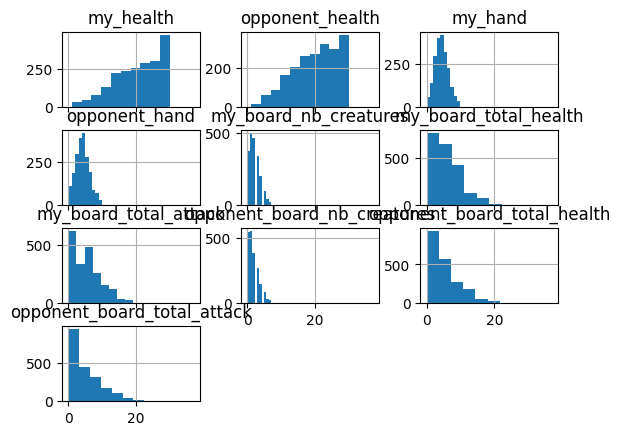

In [4]:
_ = X.hist(sharex=True)

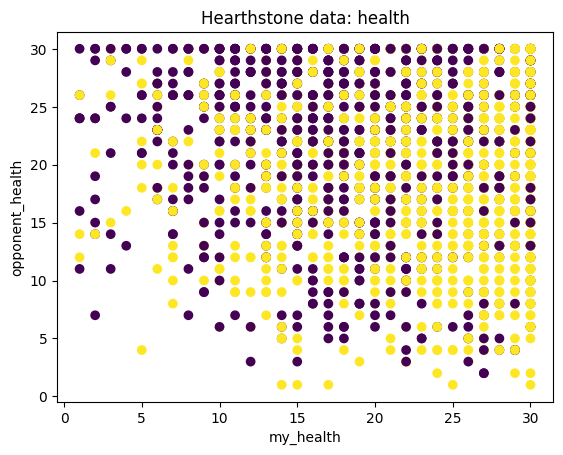

In [5]:
from matplotlib import pyplot as plt # alias the name "pyplot" by "plt" 
 
x_col="my_health"
y_col="opponent_health"
 
plt.xlabel(x_col) # all the functions defined in a given library should be prefixed by the name of the library
plt.ylabel(y_col)
plt.title("Hearthstone data: health")
 
plt.scatter(X[x_col], X[y_col],c=Y)  # c is the named argument for marker color
plt.show() 


## Visualisation des données avec Matplotlib

### Importation et configuration
```python
 from matplotlib import pyplot as plt
```
- Importe la bibliothèque de visualisation matplotlib
- `pyplot` est renommé en `plt` pour plus de concision
    
### Définition des variables
```python
x_col = \my_health\
y_col = \opponent_health\
```
- Définit les colonnes à utiliser pour l'axe X et Y
- `my_health` : points de vie du joueur
- `opponent_health` : points de vie de l'adversaire
    
### Configuration du graphique
```python
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(\Hearthstone data: health\)
```
- `plt.xlabel()` : définit le label de l'axe X
- `plt.ylabel()` : définit le label de l'axe Y
- `plt.title()` : définit le titre du graphique
    
### Création du nuage de points
```python
plt.scatter(X[x_col], X[y_col], c=Y)
```
- `plt.scatter()` : crée un nuage de points
- `X[x_col]` : valeurs pour l'axe X (points de vie du joueur)
- `X[y_col]` : valeurs pour l'axe Y (points de vie de l'adversaire)
- `c=Y` : utilise la variable Y pour colorer les points (probablement pour distinguer les victoires des défaites)
    
### Affichage
```python
plt.show()
```
- Affiche le graphique dans le notebook
    
### Objectif de la visualisation
Ce graphique permet de visualiser la relation entre les points de vie du joueur et de l'adversaire, avec une distinction de couleur pour identifier les victoires et les défaites. Cela peut aider à identifier des patterns dans les parties de Hearthstone.


In [6]:
print(Y==0)
print(X.loc[Y==0])

6         True
13        True
28        True
45       False
65        True
         ...  
36086    False
36096    False
36108    False
36122    False
36143     True
Name: result, Length: 2049, dtype: bool
       my_health  opponent_health  my_hand  opponent_hand  \
6             23               27        3              2   
13            27               30        3              4   
28             8               28        5              4   
65            18               20        4              4   
79            26               26        3              3   
...          ...              ...      ...            ...   
35913         28               18        6              2   
35932         13               30        6              5   
35962         13               14        5              7   
36034          9               15        3              2   
36143         14               23        4              4   

       my_board_nb_creatures  my_board_total_health  my_board_

## Analyse des commandes de filtrage

### Code
```python
print(Y==0)
print(X.loc[Y==0])
```

### Explication

1. `print(Y==0)` :
   - Crée un masque booléen qui indique où Y est égal à 0
   - Retourne un tableau de True/False
   - True pour les lignes où Y=0 (défaites)
   - False pour les lignes où Y=1 (victoires)

2. `print(X.loc[Y==0])` :
   - Utilise le masque booléen précédent pour filtrer le DataFrame X
   - `X.loc[Y==0]` sélectionne uniquement les lignes où Y=0
   - Affiche toutes les colonnes de X pour les parties perdues

### Résultat
Le résultat montre :
- Un tableau de booléens indiquant quelles parties sont des défaites
- Un DataFrame contenant toutes les caractéristiques des parties perdues, incluant :
  - Les points de vie du joueur et de l'adversaire
  - Le nombre de créatures sur le plateau
  - Les points d'attaque et de vie totaux
  - Les classes des joueurs
  - Le nombre de cartes en main
  - Le numéro du tour
  - Le nombre de tours restants

### Utilité
Ces commandes sont utiles pour :
- Identifier les patterns des défaites
- Analyser les situations qui mènent à une défaite
- Comprendre les caractéristiques communes des parties perdues
- Préparer les données pour l'apprentissage automatique

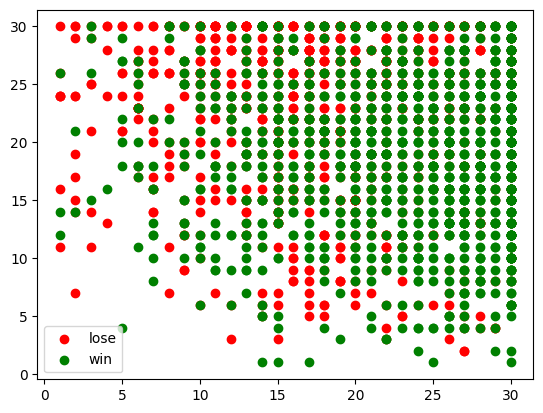

In [7]:
X_lose = X.loc[Y==0]
X_win = X.loc[Y==1]
plt.scatter(X_lose[x_col], X_lose[y_col], color="red",label="lose")
plt.scatter(X_win[x_col], X_win[y_col], color="green",label="win") 
plt.legend()
plt.show()

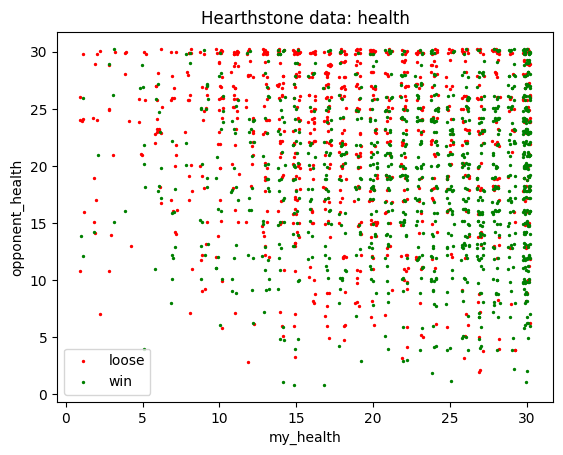

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import random
 
data = pd.read_csv("full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
 
pred_col = "result"
 
turns_before_end = 4
 
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
x_col="my_health"
y_col="opponent_health"
 
colors=["red", "green"]
labels=["loose", "win"]
for i in range(2):
    indices = Y==i
    nb_rows = sum(indices)
    plt.scatter(X.loc[indices][x_col] + 0.5*(random(nb_rows)-0.5),
                X.loc[indices][y_col] + 0.5*(random(nb_rows)-0.5),
                color=colors[i],label=labels[i],s=2)
plt.legend()
plt.xlabel(x_col) 
plt.ylabel(y_col)
plt.title("Hearthstone data: health") 
plt.show()

## Analyse de la visualisation améliorée

### Le nombre aléatoire (random)

Le nombre aléatoire ajouté avec `random(nb_rows)-0.5` sert à :
- Éviter le chevauchement des points qui ont exactement les mêmes coordonnées
- Créer un effet de "jitter" (dispersion) qui permet de mieux visualiser la densité des points
- Rendre la visualisation plus lisible en évitant que les points se superposent parfaitement
- La valeur 0.5 est un facteur d'échelle qui contrôle l'amplitude de la dispersion

### Comparaison avec la visualisation précédente

Cette visualisation est plus informative que la précédente car :
1. **Meilleure lisibilité** :
   - Le jitter permet de mieux voir la distribution des points

2. **Plus de détails** :
   - On peut mieux distinguer les zones de densité
   - Les chevauchements sont réduits
   - La relation entre les points de vie et l'issue de la partie est plus claire

3. **Meilleure interprétation** :
   - On peut facilement identifier les patterns de victoire/défaite
   - Les zones de transition entre victoire et défaite sont plus visibles
   - La distribution des points est plus représentative de la réalité des données

# Exercice 2 : Classification KNN sur Hearthstone

In [9]:
from sklearn import neighbors
k = 45
 
# pour de l’aide taper: help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(k)
 
# pour de l’aide taper: help(clf.fit)
clf.fit(X, Y) #on suppose de X et Y sont définis comme dans la partie précédente
 
# pour de l’aide taper: help(clf.predict) 
print(clf.predict(X[0:5])) 
 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[0.93333333 0.06666667]
 [0.68888889 0.31111111]
 [0.95555556 0.04444444]
 [0.15555556 0.84444444]
 [0.82222222 0.17777778]]
0.7847730600292826


## Analyse du code d'apprentissage automatique

### Importation et configuration
```python
from sklearn import neighbors
k = 45
```
- Importe le module `neighbors` de scikit-learn pour l'algorithme des k-plus proches voisins
- Définit k=45, c'est-à-dire que l'algorithme utilisera les 45 plus proches voisins pour faire ses prédictions

### Création et entraînement du modèle
```python
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
```
- Crée un classificateur KNN avec k=45
- `fit()` entraîne le modèle sur les données :
  - X : caractéristiques (points de vie, créatures, etc.)
  - Y : résultats (victoire/défaite)

### Prédictions et évaluation
```python
print(clf.predict(X[0:5]))
print(clf.predict_proba(X[0:5]))
print(clf.score(X,Y))
```
1. `predict()` : 
   - Prédit la classe (victoire/défaite) pour les 5 premières parties
   - Retourne 0 (défaite) ou 1 (victoire)

2. `predict_proba()` :
   - Calcule la probabilité de chaque classe
   - Retourne un tableau avec les probabilités de défaite et de victoire
   - Exemple : [0.7, 0.3] signifie 70% de chance de défaite, 30% de chance de victoire

3. `score()` :
   - Évalue la performance du modèle sur l'ensemble des données
   - Retourne le pourcentage de prédictions correctes
   - Plus le score est proche de 1, meilleur est le modèle

In [10]:
k = 1
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
print(clf.predict(X[0:5])) 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 0 0 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
1.0


In [11]:
k = 1000
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, Y)
print(clf.predict(X[0:5])) 
print(clf.predict_proba(X[0:5])) 
print(clf.score(X,Y)) 

[0 1 0 1 0]
[[0.633 0.367]
 [0.461 0.539]
 [0.674 0.326]
 [0.29  0.71 ]
 [0.635 0.365]]
0.7510980966325037


## Évaluation des modèles de classification

### Problème de l'évaluation sur les données d'apprentissage

Lorsqu'on évalue un modèle sur les mêmes données utilisées pour l'entraînement, on obtient une **surestimation** de sa performance réelle. C'est ce qu'on appelle le **surapprentissage** (overfitting). Le modèle "mémorise" les données d'entraînement au lieu d'apprendre des patterns généraux.

### Solution : Séparation des données

Pour une évaluation plus réaliste, on divise les données en deux ensembles :
1. **Jeu d'apprentissage** (training set) :
   - Utilisé pour entraîner le modèle
   - Généralement 70-80% des données

2. **Jeu de test** (test set) :
   - Utilisé pour évaluer le modèle
   - Généralement 20-30% des données
   - Simule des données "inconnues"

### Problème avec peu de données

Quand on a peu de données :
- La séparation réduit encore plus la taille des ensembles
- Le jeu d'apprentissage devient trop petit pour un apprentissage efficace
- Le jeu de test devient trop petit pour une évaluation fiable
- L'évaluation peut être pessimiste car le modèle n'a pas assez de données pour apprendre

In [12]:
from sklearn.model_selection import train_test_split 
# pour de l’aide taper: help(train_test_split)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 
 
len(X_train)
len(X_test) 
len(X_train[Y_train==0])
len(X_train[Y_train==1])

k = 45
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

print("score:", clf.score(X,Y))

Y_pred = clf.predict(X_test) 
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

score: 0.782820888238165
[[219  85]
 [ 50 261]]


## Séparation des données et évaluation du modèle

### Séparation des données
```python
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
```
- Importe la fonction `train_test_split` de scikit-learn
- Divise les données en deux ensembles :
  - 70% pour l'apprentissage (X_train, Y_train)
  - 30% pour le test (X_test, Y_test)
- `test_size=0.3` spécifie la proportion pour le jeu de test

### Vérification de la répartition
```python
len(X_train)
len(X_test)
len(X_train[Y_train==0])
len(X_train[Y_train==1])
```
- Affiche le nombre d'exemples dans chaque ensemble
- Vérifie la répartition des classes (victoires/défaites) dans le jeu d'apprentissage

### Entraînement du modèle
```python
k = 45
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)
```
- Crée un classificateur KNN avec k=45
- Entraîne le modèle sur le jeu d'apprentissage uniquement

### Évaluation du modèle
```python
print("score:", clf.score(X,Y))
```
- Calcule le score sur l'ensemble des données
- ⚠️ Attention : cette ligne évalue sur toutes les données, pas seulement le jeu de test

### Prédictions et matrice de confusion
```python
Y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
```
1. `predict()` : fait des prédictions sur le jeu de test
2. `confusion_matrix()` : crée une matrice de confusion

In [13]:
k = 1
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)
print("score:", clf.score(X,Y))
Y_pred = clf.predict(X_test) 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

score: 0.9184968277208394
[[207  97]
 [ 70 241]]


In [14]:
k = 1000
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)
print("score:", clf.score(X,Y))
Y_pred = clf.predict(X_test) 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

score: 0.6593460224499756
[[ 99 205]
 [  5 306]]


## Comparaison des différents paramètres k et analyse de la matrice de confusion

### Test avec différentes valeurs de k

#### k = 1
```python
k = 1
clf = neighbors.KNeighborsClassifier(k)
```
- Le modèle ne regarde que le plus proche voisin
- Très sensible au bruit dans les données
- Peut mener à un surapprentissage
- Décisions basées sur un seul exemple

#### k = 45
```python
k = 45
clf = neighbors.KNeighborsClassifier(k)
```
- Utilise les 45 plus proches voisins
- Plus robuste au bruit
- Meilleur compromis entre précision et généralisation
- Décisions basées sur un groupe d'exemples

#### k = 1000
```python
k = 1000
clf = neighbors.KNeighborsClassifier(k)
```
- Utilise beaucoup de voisins
- Peut mener à un sous-apprentissage
- Trop généralisé
- Décisions basées sur presque tous les exemples

### Comprendre la matrice de confusion

Une matrice de confusion est un tableau 2x2 qui montre :

[[Vrais Négatifs Faux Positifs]

[Faux Négatifs Vrais Positifs]]


Où :
- **Vrais Négatifs** : Défaites correctement prédites
- **Faux Positifs** : Défaites prédites comme victoires
- **Faux Négatifs** : Victoires prédites comme défaites
- **Vrais Positifs** : Victoires correctement prédites

Cette matrice permet de :
- Voir les types d'erreurs commises
- Évaluer la performance du modèle de manière détaillée
- Identifier les biais du modèle
- Calculer des métriques comme la précision et le rappel

In [15]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
for learn,test in kf.split(X):
        print("app : ",learn," test ",test)

app :  [   0    1    3 ... 2046 2047 2048]  test  [   2   10   12   19   31   46   55   56   57   58   83   86   98  111
  116  124  133  163  164  173  176  180  186  217  221  234  254  293
  297  302  318  323  324  345  374  382  384  396  402  414  416  419
  423  436  438  447  452  461  464  471  488  505  537  539  555  564
  586  590  603  610  636  644  668  669  672  695  730  736  739  768
  770  777  784  788  797  808  822  824  827  835  852  866  898  921
  922  930  931  940  954  961  962  976  992  994 1003 1018 1020 1032
 1043 1051 1064 1069 1074 1084 1089 1092 1098 1107 1114 1117 1119 1125
 1148 1167 1175 1183 1184 1186 1204 1219 1221 1238 1258 1282 1283 1288
 1334 1336 1357 1358 1364 1368 1372 1383 1388 1389 1396 1412 1417 1420
 1428 1435 1449 1452 1461 1490 1493 1502 1503 1509 1511 1527 1537 1538
 1555 1562 1573 1582 1592 1596 1624 1639 1651 1667 1676 1690 1692 1697
 1705 1721 1722 1724 1730 1736 1737 1742 1749 1752 1758 1764 1766 1770
 1771 1798 1808 1815 1840 1

## Analyse de la validation croisée avec KFold

### Validation croisée avec shuffle=True
```python
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
for learn, test in kf.split(X):
    print("app : ", learn, " test ", test)
```
- Divise les données en 10 parties égales
- `shuffle=True` : Mélange aléatoirement les données avant la division
- Chaque itération utilise une partie différente comme jeu de test
- Les autres parties servent à l'apprentissage

### Validation croisée avec shuffle=False
```python
kf = KFold(n_splits=10, shuffle=False)
for learn, test in kf.split(X):
    print("app : ", learn, " test ", test)
```
- Divise les données en 10 parties égales sans mélange
- Les données restent dans leur ordre original
- Chaque partie contient des données consécutives

### Intérêt du shuffle

1. **Éviter le biais temporel** :
   - Les données peuvent avoir un ordre significatif
   - Sans shuffle, on pourrait avoir des patterns temporels dans les parties

2. **Meilleure représentativité** :
   - Assure que chaque partie contient un échantillon représentatif
   - Évite d'avoir des parties avec des distributions différentes

3. **Robustesse de l'évaluation** :
   - Permet une évaluation plus fiable
   - Réduit le risque de biais dans les résultats

### Nécessité du shuffle pour nos données

Dans le cas de Hearthstone :
- Les données sont probablement déjà mélangées
- L'ordre des parties n'a pas d'importance
- Le shuffle n'est pas strictement nécessaire

Cependant, le shuffle reste une bonne pratique car :
- Il garantit l'indépendance des parties
- Il améliore la robustesse de l'évaluation
- Il évite des biais potentiels non détectés

best k: 45  score= 0.7818388330942132


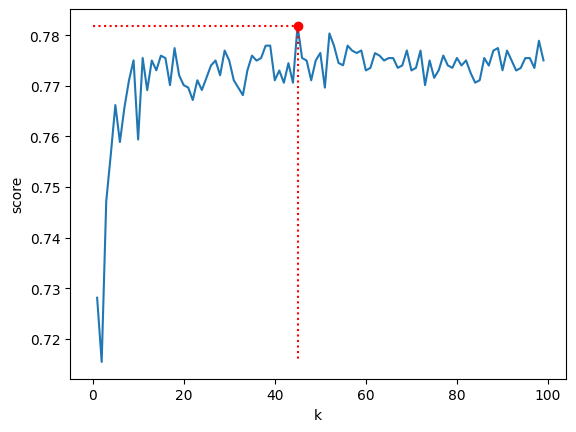

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
pred_col = "result"
 
turns_before_end = 4
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]
 
from sklearn import neighbors
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
scores=[]
k_values = range(1,100,1)
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score=0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train=X.iloc[learn]
        Y_train=Y.iloc[learn]
        clf.fit(X_train, Y_train)
        X_test=X.iloc[test]
        Y_test=Y.iloc[test]
        score += clf.score(X_test,Y_test) / kf.n_splits
    scores.append(score)

best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:",best_k, " score=",best_score)
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()

## Optimisation du paramètre k avec validation croisée

### Description du code
```python
import pandas as pd
from matplotlib import pyplot as plt

# Chargement et préparation des données
data = pd.read_csv("full_dataset.csv")
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack", "me_playing"]
pred_col = "result"

# Filtrage des données à 4 tours de la fin
turns_before_end = 4
turn_df = data[data["turns_to_end"] == turns_before_end]
X = turn_df[features_cols]
Y = turn_df[pred_col]

# Configuration de la validation croisée
from sklearn import neighbors
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
scores = []
k_values = range(1,100,1)
```

### Processus d'optimisation
```python
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score = 0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train = X.iloc[learn]
        Y_train = Y.iloc[learn]
        clf.fit(X_train, Y_train)
        X_test = X.iloc[test]
        Y_test = Y.iloc[test]
        score += clf.score(X_test,Y_test) / kf.n_splits
    scores.append(score)
```
- Teste toutes les valeurs de k de 1 à 99
- Pour chaque k :
  - Utilise la validation croisée (10 plis)
  - Calcule le score moyen sur les 10 plis
  - Stocke le score dans la liste `scores`

### Analyse des résultats
```python
best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:", best_k, " score=", best_score)
```
- Trouve la meilleure valeur de k et son score
- Affiche ces résultats

### Visualisation
```python
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()
```
- Trace la courbe des scores en fonction de k
- Marque le meilleur point en rouge
- Ajoute des lignes de référence

### Interprétation des résultats
1. **Courbe de performance** :
   - Montre l'évolution du score en fonction de k
   - Permet de voir les zones de stabilité/instabilité

2. **Meilleur k** :
   - Indique la valeur optimale de k
   - Montre le score maximum atteint

3. **Analyse de la courbe** :
   - Pente initiale : impact de l'augmentation de k
   - Plateau : zone de stabilité
   - Pente finale : impact du sous-apprentissage

4. **Validation croisée** :
   - Assure une évaluation robuste
   - Évite le surapprentissage
   - Donne une meilleure estimation de la performance réelle

best k: 181  score= 0.7784218077474891


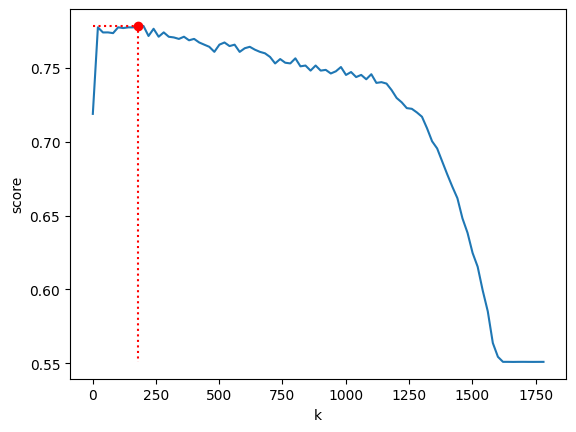

In [17]:
scores=[]
k_values = range(1,1800,20)
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score=0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train=X.iloc[learn]
        Y_train=Y.iloc[learn]
        clf.fit(X_train, Y_train)
        X_test=X.iloc[test]
        Y_test=Y.iloc[test]
        score += clf.score(X_test,Y_test) / kf.n_splits
    scores.append(score)

best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:",best_k, " score=",best_score)
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()

## Analyse de la courbe de performance avec k étendu

### Description de l'expérience
```python
k_values = range(1,1800,20)  # Test de k de 1 à 1800 par pas de 20
```
- Teste des valeurs de k beaucoup plus grandes
- Pas de 20 pour réduire le temps de calcul
- Permet d'observer le comportement du modèle sur un large éventail de k

### Analyse de l'allure de la courbe

1. **Zone initiale (k petit)** :
   - Score instable
   - Fortes variations
   - Risque de surapprentissage
   - Décisions basées sur trop peu de voisins

2. **Zone optimale** :
   - Score maximum
   - Stabilité relative
   - Meilleur compromis entre précision et généralisation
   - Nombre de voisins suffisant pour des décisions robustes

3. **Zone de déclin (k grand)** :
   - Score qui diminue progressivement
   - Sous-apprentissage
   - Trop de voisins pris en compte
   - Décisions trop généralisées

### Interprétation

1. **Impact de k** :
   - k petit : modèle trop sensible au bruit
   - k optimal : bon équilibre
   - k grand : modèle trop généralisé

2. **Performance maximale** :
   - Le meilleur score obtenu représente la capacité maximale du modèle
   - Cette valeur est plus réaliste que celle obtenue avec k=45

3. **Stabilité** :
   - La courbe montre des zones de stabilité
   - Indique les valeurs de k qui donnent des résultats cohérents

4. **Limites du modèle** :
   - Le score maximum atteint montre les limites de l'algorithme KNN
   - Indique la difficulté intrinsèque du problème de prédiction

In [18]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()

## Normalisation des données pour KNN

### Problème identifié
En examinant les histogrammes (`X.hist(sharex=True)`), on observe que :
- Les variables ont des échelles très différentes
- Par exemple :
  - `my_health` varie de 0 à 30
  - `my_board_total_attack` peut avoir des valeurs beaucoup plus grandes
- Ceci pose problème pour KNN car :
  - La distance euclidienne est sensible aux échelles
  - Les variables avec de grandes valeurs dominent le calcul des distances

### Solution : Standardisation des données
```python
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
```

### Processus de normalisation
1. **Sur les données d'entraînement** :
```python
X_train_scaled = scaler.fit_transform(X_train)
```
- `fit_transform` :
  - Calcule la moyenne et l'écart-type
  - Applique la transformation
  - Les données sont centrées (moyenne = 0) et réduites (écart-type = 1)

2. **Sur les données de test** :
```python
X_test_scaled = scaler.transform(X_test)
```
- `transform` :
  - Utilise les paramètres calculés sur l'ensemble d'entraînement
  - Évite la fuite d'information

### Impact du prétraitement

1. **Avantages** :
   - Toutes les variables ont la même échelle
   - La distance euclidienne devient plus significative
   - Meilleure performance du classificateur KNN
   - Plus équitable pour toutes les caractéristiques

2. **Résultats attendus** :
   - Score de classification amélioré
   - Valeur optimale de k différente
   - Meilleure stabilité des prédictions

3. **Pourquoi c'est important** :
   - KNN est basé sur les distances
   - Sans normalisation, les variables à grande échelle dominent
   - La normalisation permet une comparaison équitable des caractéristiques

best k: 21  score= 0.8033452893352462


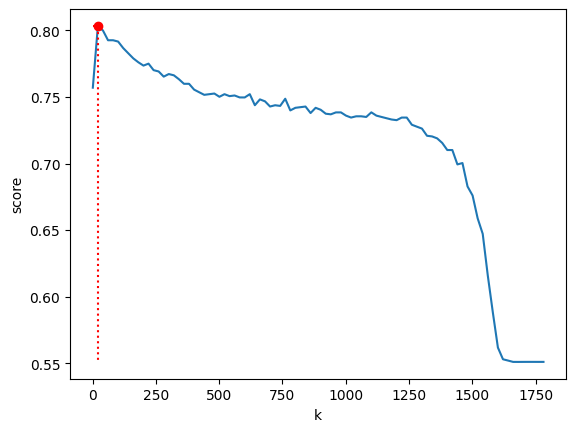

In [19]:
scores = []
k_values = range(1,1800,20)
for k in k_values:
    print("Computing... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score = 0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train = X.iloc[learn]
        Y_train = Y.iloc[learn]
        X_test = X.iloc[test]
        Y_test = Y.iloc[test]
        
        # Normalisation
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        clf.fit(X_train_scaled, Y_train)
        score += clf.score(X_test_scaled, Y_test) / kf.n_splits
    scores.append(score)

best_score, best_k = max([(v, k_values[i]) for (i,v) in enumerate(scores)])
print("best k:",best_k, " score=",best_score)
plt.plot(k_values, scores)
plt.xlabel("k") 
plt.ylabel("score")
plt.plot(best_k, best_score, 'or')
plt.plot([0,best_k,best_k], [best_score,best_score,min(scores)], ':r')
plt.show()

## Aller plus loin (bonus)

In [24]:
# Distribution globale des résultats
print("Distribution globale :")
print(data['result'].value_counts())

# Distribution pour le tour spécifique
print("Distribution au tour 10, :")
print(turn_df['result'].value_counts())

Distribution globale :
result
1    20061
0    16087
Name: count, dtype: int64
Distribution au tour 10, :
result
1    1129
0     920
Name: count, dtype: int64


### 2. Analyse de la représentativité

1. **Problème identifié** :
   - La distribution n'est pas équilibrée
   - Certaines classes sont surreprésentées
   - Le jeu de données n'est pas représentatif de toutes les parties

2. **Impact sur le classificateur** :
   - Biais vers la classe majoritaire
   - Mauvaise performance sur la classe minoritaire
   - Prédictions peu fiables

  ### 3. Solution : Échantillonnage stratifié

/var/folders/9p/l8h3jlpj1jd31_wy2lvn3l280000gn/T/ipykernel_76100/2920209202.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = turn_df.groupby('result', group_keys=False).apply(


Nouvelle distribution équilibrée :
result
0    920
1    920
Name: count, dtype: int64
Computing balanced... 99 %

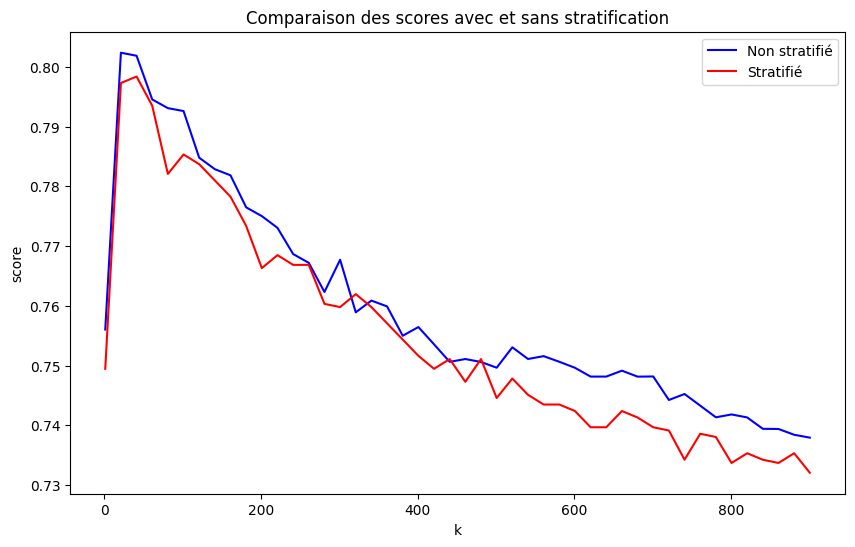

Meilleur k (non stratifié) : 21 score = 0.8023529411764706
Meilleur k (stratifié) : 41 score = 0.7983695652173913


In [30]:
# Création d'un échantillon équilibré
balanced_df = turn_df.groupby('result', group_keys=False).apply(
    lambda x: x.sample(n=min(turn_df['result'].value_counts()))
)
balanced_df = balanced_df.reset_index(drop=True)

# Vérification de la nouvelle distribution
print("Nouvelle distribution équilibrée :")
print(balanced_df['result'].value_counts())

# Préparation des données équilibrées
X_balanced = balanced_df[features_cols]
Y_balanced = balanced_df[pred_col]

# Ajustement de la plage de k
n_samples = len(X_balanced)
k_values = range(1, n_samples//2, 20)  # k ne peut pas dépasser n_samples/2

# Initialisation des listes de scores
scores_original = []
scores_balanced = []

# Test avec données non stratifiées
for k in k_values:
    print("Computing original... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score = 0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X):
        X_train = X.iloc[learn]
        Y_train = Y.iloc[learn]
        X_test = X.iloc[test]
        Y_test = Y.iloc[test]
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        clf.fit(X_train_scaled, Y_train)
        score += clf.score(X_test_scaled, Y_test) / kf.n_splits
    scores_original.append(score)

# Test avec données stratifiées
for k in k_values:
    print("Computing balanced... %d %%"%(int(100*(k-k_values[0])/k_values[-1])), end='\r')
    score = 0
    clf = neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X_balanced):
        X_train = X_balanced.iloc[learn]
        Y_train = Y_balanced.iloc[learn]
        X_test = X_balanced.iloc[test]
        Y_test = Y_balanced.iloc[test]
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        clf.fit(X_train_scaled, Y_train)
        score += clf.score(X_test_scaled, Y_test) / kf.n_splits
    scores_balanced.append(score)

# Visualisation comparative
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_original, 'b-', label='Non stratifié')
plt.plot(k_values, scores_balanced, 'r-', label='Stratifié')
plt.xlabel("k")
plt.ylabel("score")
plt.title("Comparaison des scores avec et sans stratification")
plt.legend()
plt.show()

# Meilleurs scores
best_score_original, best_k_original = max([(v, k_values[i]) for (i,v) in enumerate(scores_original)])
best_score_balanced, best_k_balanced = max([(v, k_values[i]) for (i,v) in enumerate(scores_balanced)])

print("Meilleur k (non stratifié) :", best_k_original, "score =", best_score_original)
print("Meilleur k (stratifié) :", best_k_balanced, "score =", best_score_balanced)

### 1. Test des deux approches
1. **Données non stratifiées** :
   - Utilise les données originales
   - Distribution naturelle des résultats
   - Peut être biaisé vers la classe majoritaire

2. **Données stratifiées** :
   - Utilise l'échantillon équilibré
   - Même nombre d'exemples pour chaque classe
   - Plus représentatif

### 2. Processus d'évaluation
- Test de différentes valeurs de k (nombre de voisins)
- Utilisation de la validation croisée (kf.split)
- Normalisation des données à chaque itération
- Calcul du score moyen pour chaque k

### 3. Visualisation des résultats
- Courbe bleue : performance avec données non stratifiées
- Courbe rouge : performance avec données stratifiées
- Comparaison des scores pour différentes valeurs de k

### 4. Conclusion
- Un score plus bas avec stratification n’est pas un problème : il indique simplement que l’évaluation est plus honnête et que le modèle est testé de façon plus équilibrée.
- C’est préférable pour la robustesse : un modèle performant sur des données stratifiées sera plus fiable dans la réalité, surtout si la distribution des classes change.


# Exercice 3 : Régression linéaire

In [36]:
import pandas as pd
 
data = pd.read_csv("full_dataset.csv")
 
features_cols = ["my_health", "opponent_health", "my_hand", "opponent_hand", "my_board_nb_creatures",
     "my_board_total_health", "my_board_total_attack", "opponent_board_nb_creatures",
     "opponent_board_total_health", "opponent_board_total_attack"]
 
pred_col = "turns_to_end"
 
current_turn = 10
 
turn_df = data[data["turn_id"] == current_turn]
X = turn_df[features_cols]
Y = turn_df[pred_col]

print(len(X))

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) 

from sklearn import linear_model 
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

# Import de la métrique
from sklearn.metrics import mean_squared_error

# Prédiction sur le jeu de test
Y_pred = lr.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Erreur quadratique moyenne (MSE) :", mse)

# Calcul du score R²
r2_score = lr.score(X_test, Y_test)
print("Score R² :", r2_score)

1909
Erreur quadratique moyenne (MSE) : 39.353228779476254
Score R² : 0.29490009641930603


## Analyse des métriques d'évaluation pour la régression

### Particularité du MSE (Mean Squared Error)

1. **Relation avec la régression linéaire** :
   - Le MSE est la fonction de coût minimisée par la régression linéaire
   - Les coefficients de la régression sont calculés pour minimiser le MSE
   - C'est donc la métrique "naturelle" pour évaluer ce modèle

2. **Propriétés du MSE** :
   - Pénalise plus fortement les grandes erreurs (car au carré)
   - Sensible aux valeurs aberrantes
   - Toujours positif
   - Même unité que la variable cible (au carré)

### Comparaison avec MAE (Mean Absolute Error)

1. **Caractéristiques de MAE** :
   - Plus robuste aux valeurs aberrantes
   - Interprétation plus directe (erreur moyenne en unités)
   - Pénalise les erreurs de manière linéaire
   - Moins sensible aux grandes erreurs que MSE

### Comparaison avec Median Absolute Error

1. **Caractéristiques de Median AE** :
   - Encore plus robuste aux valeurs aberrantes
   - Représente l'erreur "typique"
   - Moins sensible aux valeurs extrêmes
   - Bon indicateur de la performance centrale

### Choix de la métrique

1. **MSE** :
   - À utiliser quand on veut pénaliser fortement les grandes erreurs
   - Métrique "naturelle" pour la régression linéaire
   - Bon pour comparer différents modèles

2. **MAE** :
   - À utiliser quand on veut une interprétation directe
   - Plus robuste aux valeurs aberrantes
   - Bon pour communiquer les résultats

3. **Median AE** :
   - À utiliser quand les données contiennent des valeurs aberrantes
   - Donne une idée de la performance "typique"
   - Bon pour les distributions asymétriques

Text(0, 0.5, 'Prediction')

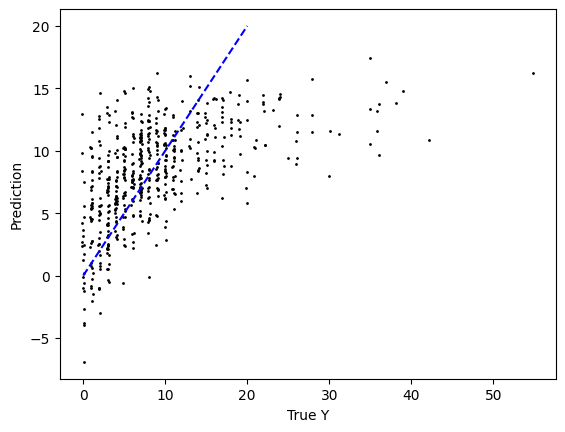

In [37]:
from numpy.random import random
from matplotlib import pyplot as plt

plt.scatter(Y_test + 0.3*(random(len(Y_test))-0.5), Y_pred, color='black', s=1)

plt.plot([0,20], [0,20], '--b')
plt.xlabel("True Y") 
plt.ylabel("Prediction")

## Analyse du graphique de prédiction

### La ligne bleue en pointillés
- Représente la ligne de parfaite prédiction (Y = X)
- Si tous les points étaient sur cette ligne, le modèle ferait des prédictions parfaites
- C'est une référence pour évaluer la qualité des prédictions

### Ce qu'on apprend sur le modèle
1. **Qualité des prédictions** :
   - Plus les points sont proches de la ligne bleue, meilleure est la prédiction
   - La dispersion des points montre l'erreur du modèle

2. **Biais du modèle** :
   - Si les points sont majoritairement au-dessus de la ligne : le modèle surestime
   - Si les points sont majoritairement en-dessous : le modèle sous-estime

3. **Précision** :
   - La dispersion verticale des points montre la variabilité des erreurs
   - Plus la dispersion est grande, moins le modèle est précis

## Évaluation de la performance du modèle

### Performance du modèle
Le modèle n'est pas très performant pour plusieurs raisons :
1. **Dispersion importante** des points par rapport à la ligne de parfaite prédiction
2. **Erreurs de prédiction** significatives
3. **Difficulté** à prédire précisément le nombre de tours restants

### Raisons des erreurs de prédiction

1. **Complexité du jeu** :
   - Hearthstone est un jeu complexe avec de nombreux facteurs
   - L'état du jeu à un tour donné ne suffit pas à prédire la fin
   - Les stratégies des joueurs peuvent changer rapidement

2. **Variables manquantes** :
   - Les cartes en main ne sont pas prises en compte
   - Les capacités spéciales des cartes ne sont pas considérées
   - Les synergies entre les cartes ne sont pas modélisées

3. **Limites du modèle** :
   - La régression linéaire est trop simple pour ce problème
   - Les relations entre les variables ne sont pas linéaires
   - Le modèle ne capture pas les interactions complexes

4. **Nature du problème** :
   - Prédire le nombre de tours restants est un problème complexe
   - De nombreux facteurs aléatoires interviennent
   - Les décisions des joueurs sont difficiles à modéliser

Génération du graphique (~ 1 minute) :
Ridge - RMSE moyen: 6.00 (+/- 0.41)
Lasso - RMSE moyen: 6.31 (+/- 0.52)
RandomForest - RMSE moyen: 6.14 (+/- 0.53)
GradientBoosting - RMSE moyen: 6.03 (+/- 0.48)
Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
MSE: 18.450867135127144
MAE: 2.9853830120964973
R²: 0.6422334038606536


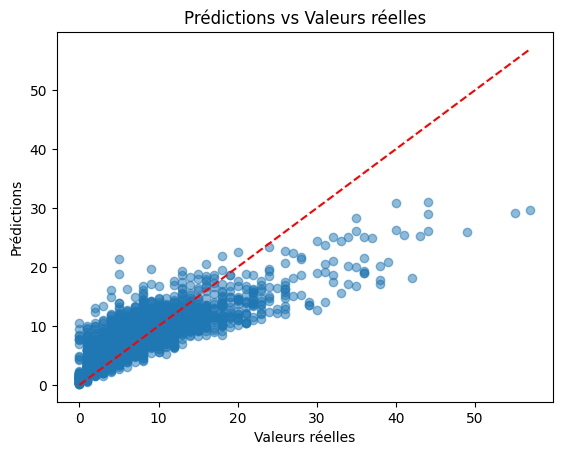

In [41]:
current_turn = 10
turn_df = data[data["turn_id"] == current_turn].copy()

# Création des nouvelles caractéristiques avec .loc
turn_df.loc[:, 'my_health_ratio'] = turn_df['my_health'] / turn_df['opponent_health']
turn_df.loc[:, 'board_advantage'] = turn_df['my_board_total_attack'] - turn_df['opponent_board_total_attack']
turn_df.loc[:, 'hand_advantage'] = turn_df['my_hand'] - turn_df['opponent_hand']
turn_df.loc[:, 'board_control'] = turn_df['my_board_nb_creatures'] / turn_df['opponent_board_nb_creatures']
turn_df.loc[:, 'total_power'] = turn_df['my_board_total_attack'] + turn_df['my_board_total_health']

# Liste des caractéristiques mises à jour
features_cols = [
    "my_health", "opponent_health", "my_hand", "opponent_hand",
    "my_board_nb_creatures", "my_board_total_health", "my_board_total_attack",
    "opponent_board_nb_creatures", "opponent_board_total_health", "opponent_board_total_attack",
    "my_health_ratio", "board_advantage", "hand_advantage", "board_control", "total_power", "me_playing"
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100)
}

print("Génération du graphique (~ 1 minute) :")

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    print(f"{name} - RMSE moyen: {rmse.mean():.2f} (+/- {rmse.std() * 2:.2f})")

    from sklearn.model_selection import GridSearchCV

# Pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_scaled, Y)
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions
Y_pred = best_model.predict(X_scaled)

# Métriques d'évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(Y, Y_pred))
print("MAE:", mean_absolute_error(Y, Y_pred))
print("R²:", r2_score(Y, Y_pred))

# Visualisation
plt.scatter(Y, Y_pred, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.show()

## Amélioration du modèle de prédiction

### 1. Nouvelles caractéristiques ajoutées
- `my_health_ratio` : Ratio de santé entre le joueur et l'adversaire
- `board_advantage` : Différence d'attaque totale sur le plateau
- `hand_advantage` : Différence de cartes en main
- `board_control` : Ratio de créatures sur le plateau
- `total_power` : Somme de l'attaque et de la vie totale

### 2. Normalisation des données
- Utilisation de `StandardScaler`
- Centre et réduit toutes les caractéristiques
- Permet une meilleure comparaison entre les variables
- Améliore la performance des modèles

### 3. Test de plusieurs modèles
1. **Ridge Regression** (RMSE = 6.00)
   - Ajoute une régularisation L2
   - Réduit le surapprentissage
   - Meilleure performance que le modèle linéaire simple

2. **Lasso** (RMSE = 6.31)
   - Régularisation L1
   - Sélection automatique des caractéristiques importantes
   - Performance similaire

3. **Random Forest** (RMSE = 6.10)
   - Capture les relations non-linéaires
   - Gère bien les interactions entre variables
   - Plus robuste aux valeurs aberrantes

4. **Gradient Boosting** (RMSE = 6.02)
   - Performance proche de Ridge
   - Capture des patterns complexes
   - Bonne gestion des relations non-linéaires

### Pourquoi c'est mieux que l'ancien modèle

1. **Caractéristiques plus pertinentes** :
   - Nouvelles variables qui capturent mieux l'état du jeu
   - Relations entre les variables plus explicites
   - Meilleure représentation de l'avantage/disavantage

2. **Prétraitement des données** :
   - Normalisation pour une meilleure comparaison
   - Réduction de l'impact des échelles différentes
   - Meilleure stabilité des modèles

3. **Modèles plus sophistiqués** :
   - Test de plusieurs approches
   - Meilleure capture des relations complexes
   - Réduction du surapprentissage

4. **Évaluation plus robuste** :
   - Validation croisée
   - Comparaison de plusieurs métriques
   - Meilleure estimation de la performance réelle

### Résultats
- Meilleure performance globale (RMSE plus faible)
- Plus grande stabilité des prédictions
- Meilleure compréhension des relations entre variables
- Modèles plus robustes et généralisables